In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
library(caret)
library(e1071)
library(nnet)
library(stringr)
tai <- read.csv("./Data/Titanic_train.csv")
head(tai)

필요한 패키지를 로딩중입니다: ggplot2



필요한 패키지를 로딩중입니다: lattice



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
table(is.na(tai))
colSums(is.na(tai))


FALSE  TRUE 
10515   177 

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [4]:
#tai$SibSp
tai[c(7,8)]

# 7,8 컬럼을 합치면 동반가족 수를 알수있다 
tai$familyWhith <- apply(tai[c(7,8)],1,sum)
head(tai)

SibSp,Parch
<int>,<int>
1,0
1,0
0,0
1,0
0,0
0,0
0,0
3,1
0,2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


In [5]:
# 운임이랑 생존율은 별로 상관이 없다
cor( tai$Fare , tai$Survived)

[1] 0.2573065

In [6]:
# 동반 가족 수 와 티켓 등급 상관 진자 없음
cor( tai$Pclass, tai$SibSp)
# 운임 이랑 동반 가족수 상관없다
cor( tai$Survived, tai$familyWhith)

# 객실 등급이랑 가족 등반 상관없내
cor(tai$Pclass , tai$familyWhith)

# 

[1] 0.08308136

[1] 0.01663899

[1] 0.06599691

In [7]:
head(tai)
# 나이가 NA 인 거만 뽑기
Nadata <- tai[is.na(tai$Age),]

nrow(Nadata)
sum(Nadata[2])
# 나이가 NA 인 사람들의 생존률
52 / 177 * 100

sum(Nadata[8])
# 3등석인 사람이 압도적으로 높다
table(Nadata$Pclass)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


[1] 177

[1] 52

[1] 29.37853

[1] 32


  1   2   3 
 30  11 136 

In [8]:
177 / 30 
177 / 11
177 / 136

[1] 5.9

[1] 16.09091

[1] 1.301471

In [9]:
#  나이가 NA 인 사람들중에 3등급 티켓인 사람들이 압도적으로 높다
withoutNA<- subset(tai, !is.na(tai$Age))
withoutNA

table(withoutNA$Pclass)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,4
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,2
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,1



  1   2   3 
186 173 355 

In [10]:
# 3등급 티켓인 사람들의 평균 나이를 모아보자
class3Age <- subset(withoutNA, Pclass == 3)
class3Age

apply(class3Age[6],2,sum)

# 3등급 티켓의 평균 나이 
trunc(mean(class3Age$Age))
# 25.1.2634.. 인데 25 살로 정함



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,0
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,0
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S,4
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S,2
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
13,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,,S,0
14,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,,S,6
15,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,,S,0


Age 
8924.92

[1] 25

In [11]:
head(tai)
range(withoutNA$Age)
range(class3Age$Age)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


[1]  0.42 80.00

[1]  0.42 74.00

In [12]:
# 전체 데이터에 Na 를 뺀  나이 평균
mean(tai$Age,na.rm = T)
# 3등급인  사람들중에 NA 뺀 나이평균
mean(class3Age$Age)
# 

[1] 29.69912

[1] 25.14062

In [13]:
summary(class3Age$Age)
# 나이가 정규분포를 이룬다

table(class3Age$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   18.00   24.00   25.14   32.00   74.00 


0.42 0.75    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
   1    2    5    7    3    7    3    2    2    2    8    2    3    1    1    4 
14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 24.5   25   26 
   1    4   12    8   16   14   15    1   17   20    5    1   13    1   13   14 
  27   28 28.5   29   30 30.5   31   32   33   34 34.5   35   36   37   38   39 
   8   12    2   11   11    2    7   12    8    4    1    6    6    2    4    6 
  40 40.5   41   42   43   44   45 45.5   47   48   49   50   51 55.5   59   61 
   5    2    4    4    3    4    5    1    3    2    1    1    3    1    1    1 
  63   65 70.5   74 
   1    1    1    1 

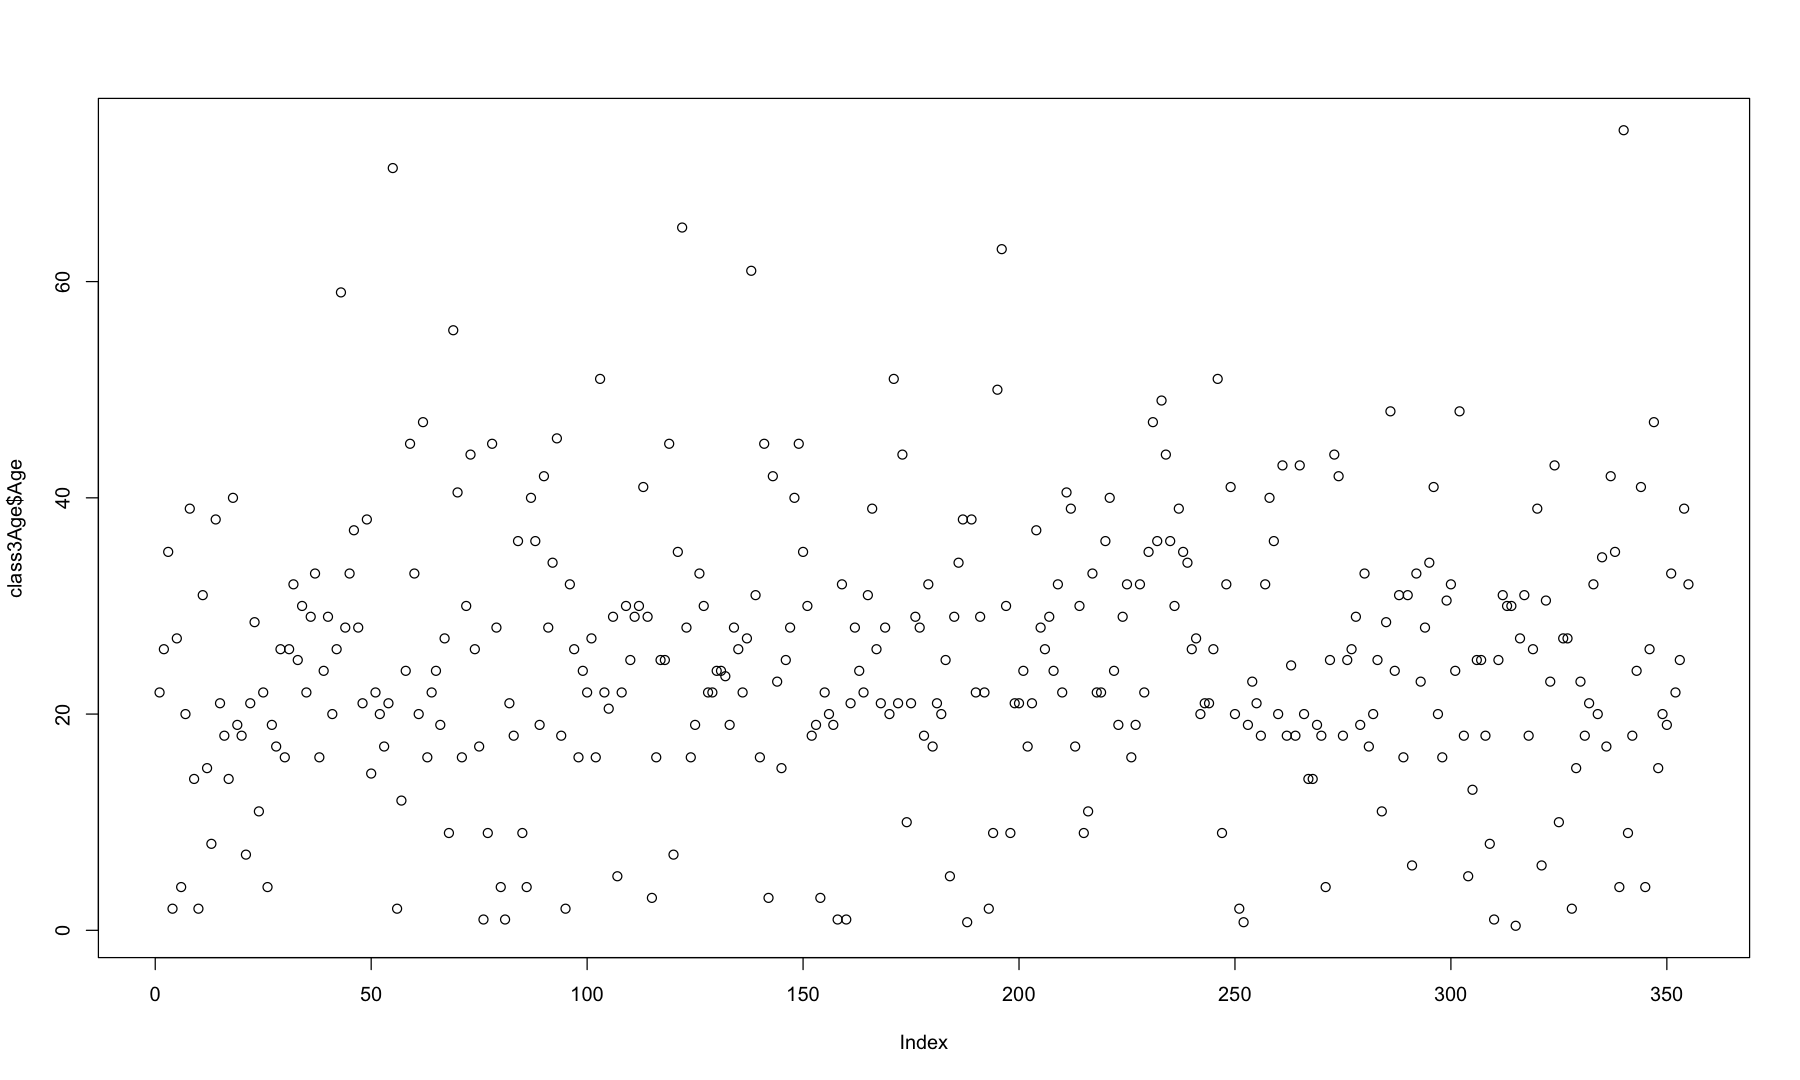

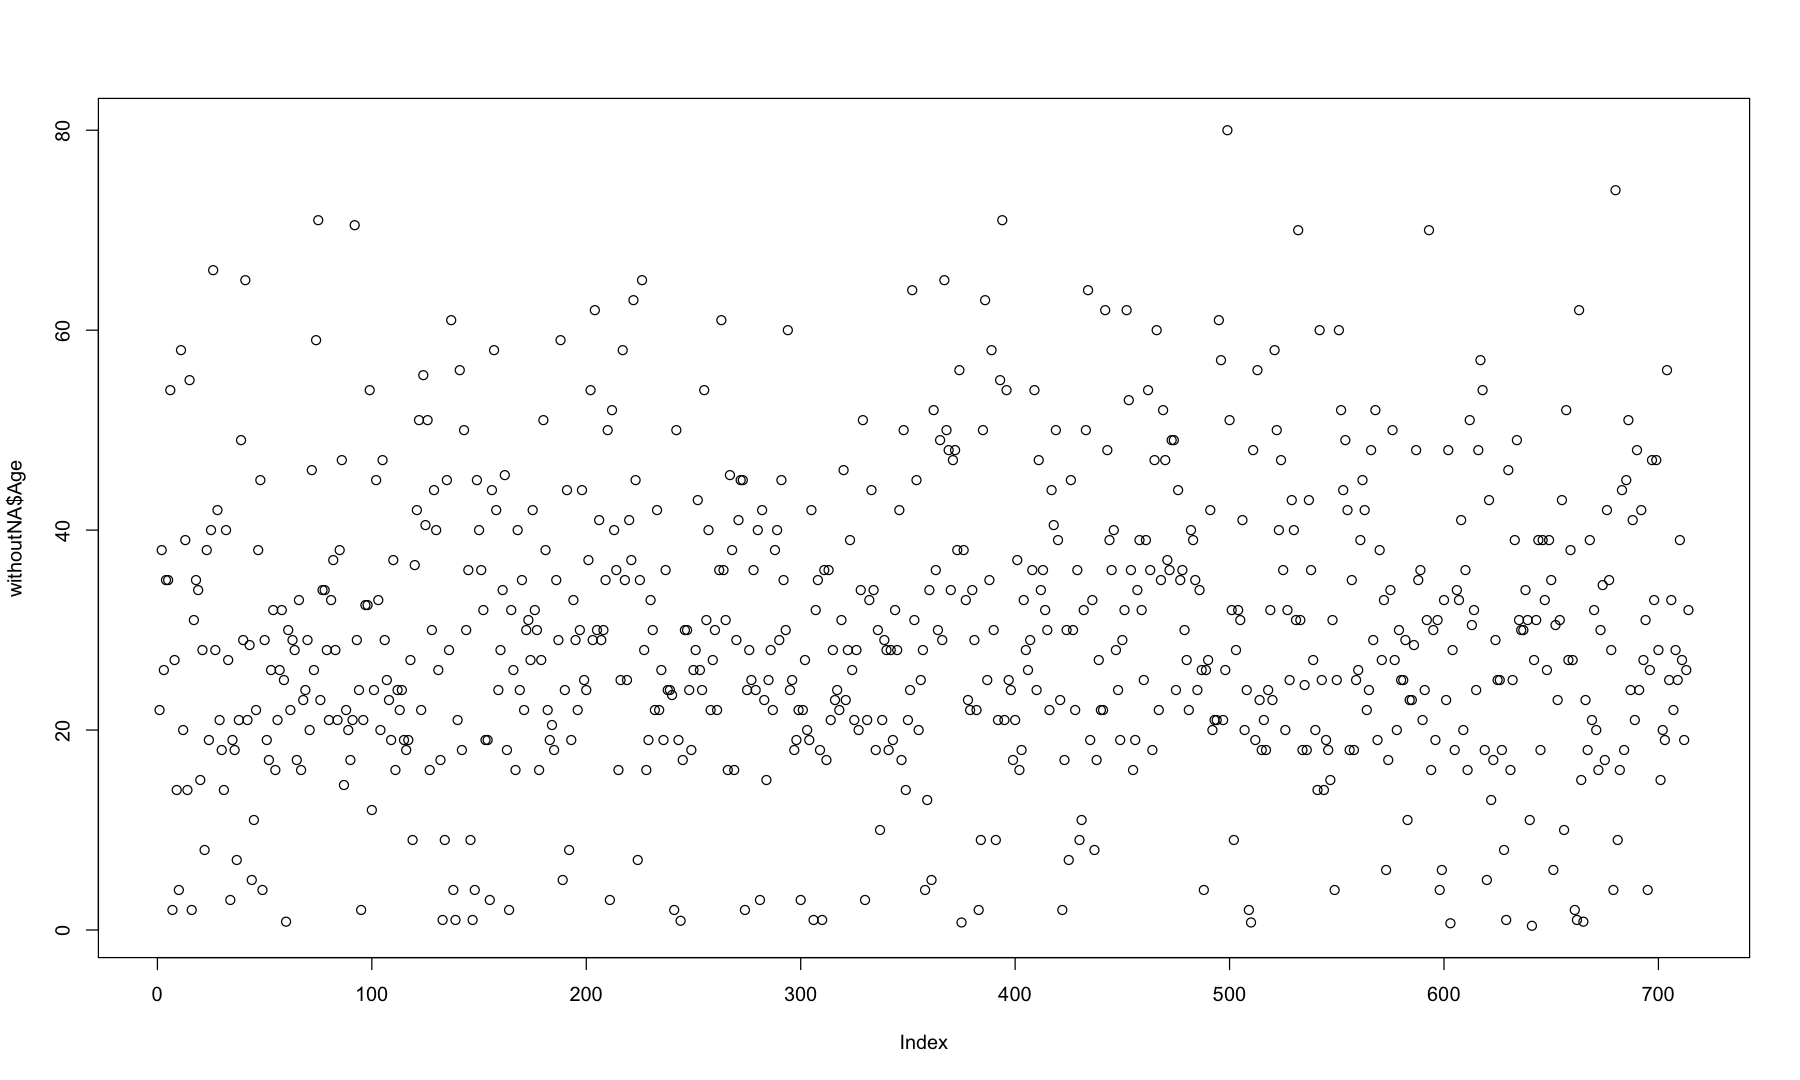

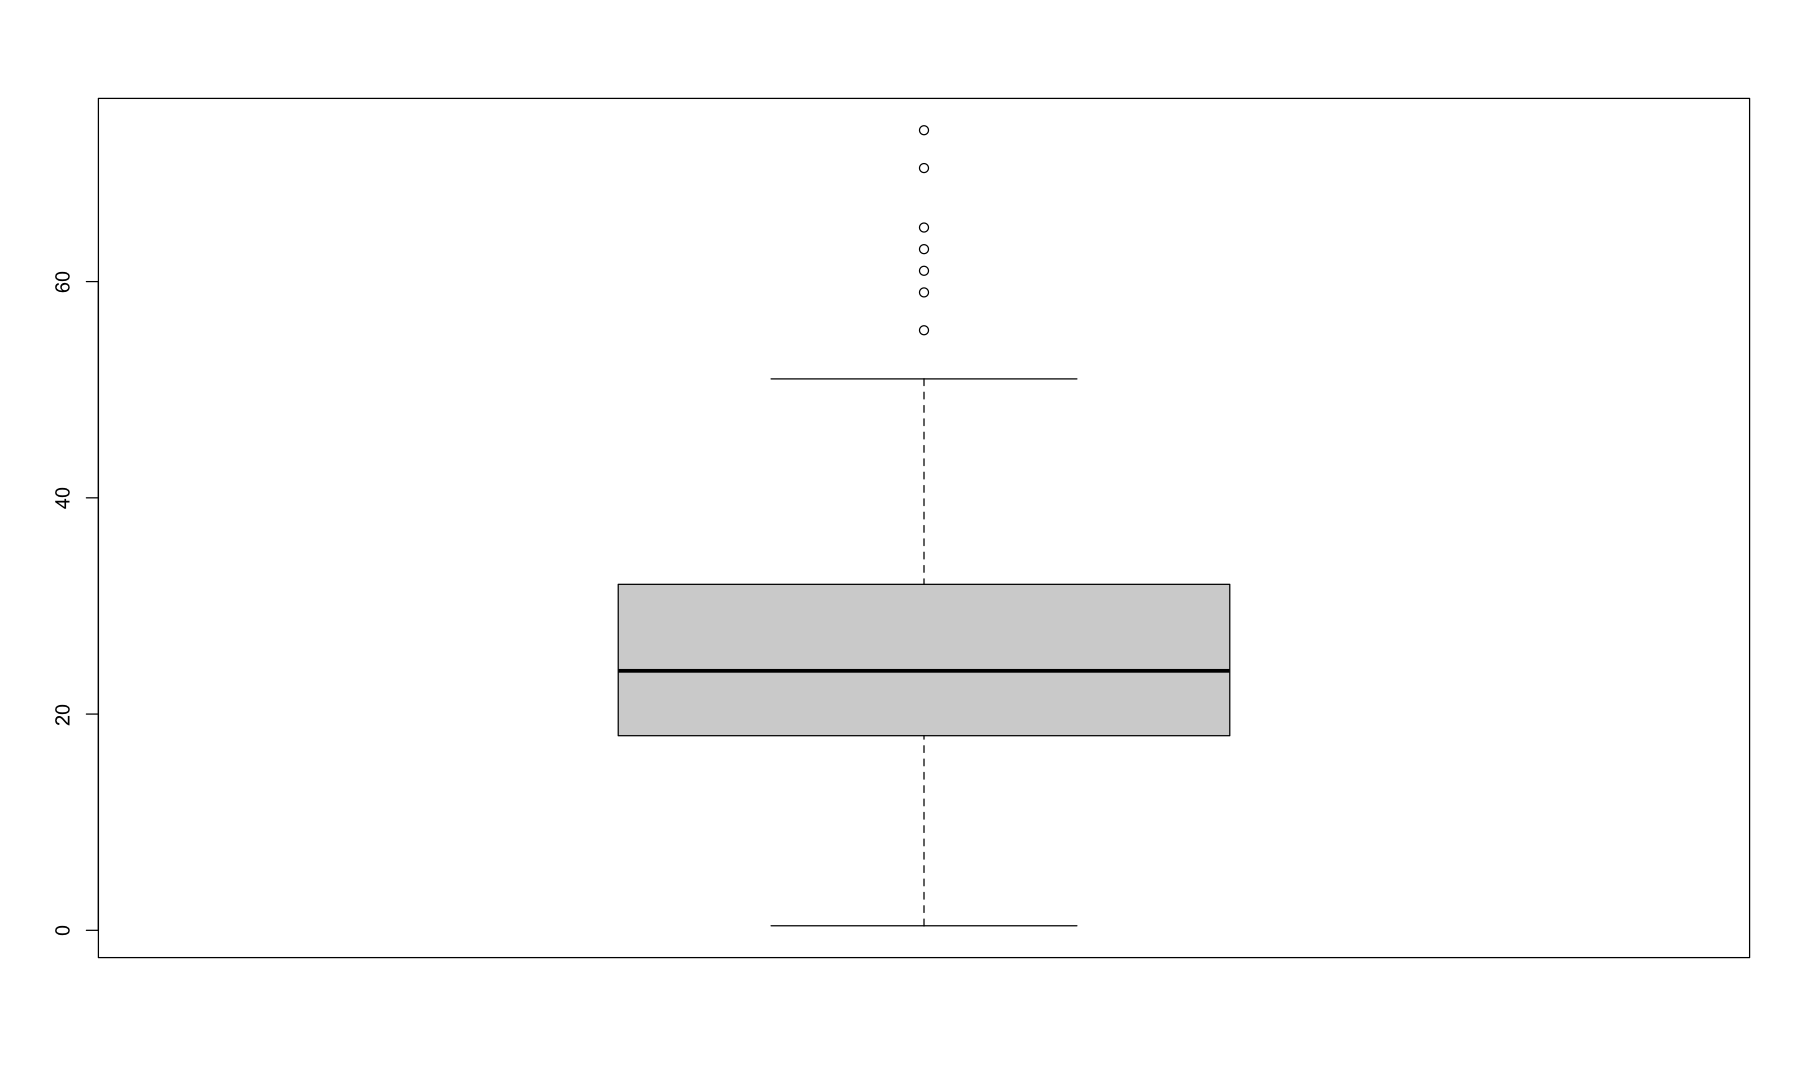

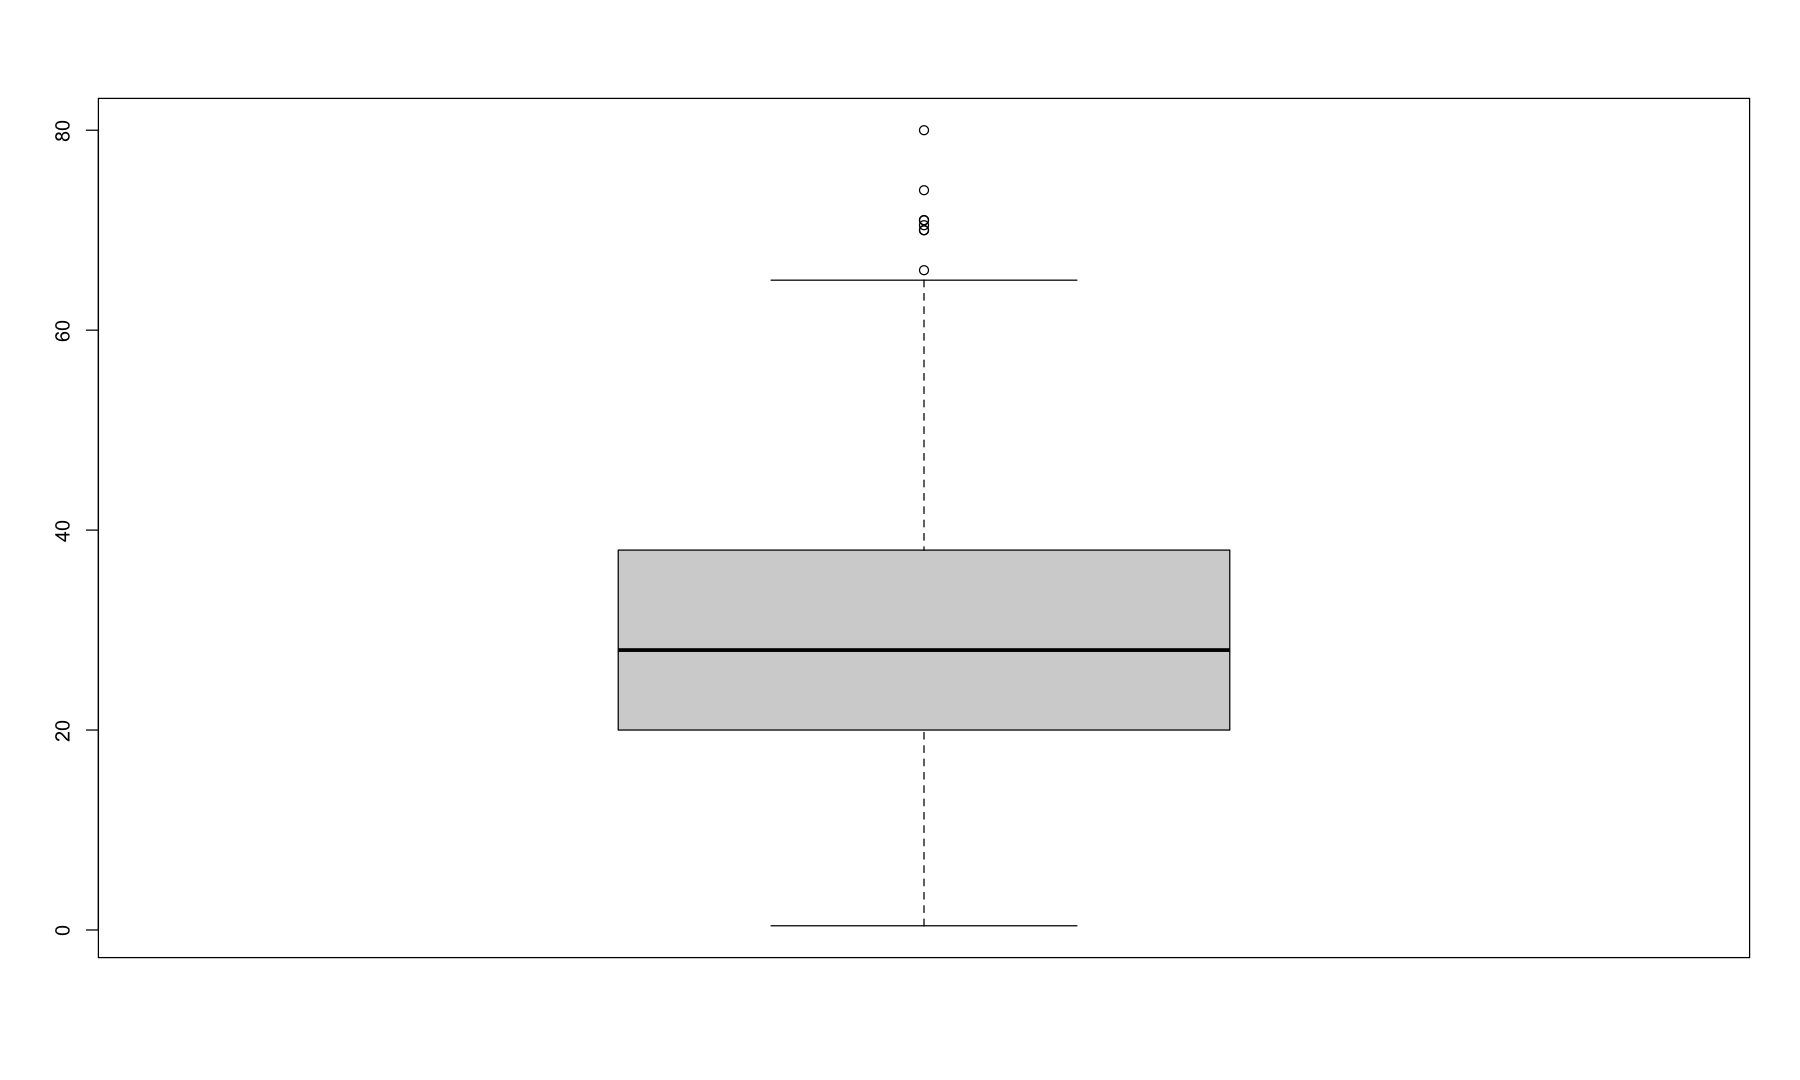

In [14]:
par(bg = 'white')
plot(class3Age$Age)
plot(withoutNA$Age)
boxplot(class3Age$Age)
boxplot(withoutNA$Age)

In [15]:
sortedData <- sort(class3Age$Age)
sortedData


[1]  0.42  0.75  0.75  1.00  1.00  1.00  1.00  1.00  2.00  2.00  2.00  2.00
 [13]  2.00  2.00  2.00  3.00  3.00  3.00  4.00  4.00  4.00  4.00  4.00  4.00
 [25]  4.00  5.00  5.00  5.00  6.00  6.00  7.00  7.00  8.00  8.00  9.00  9.00
 [37]  9.00  9.00  9.00  9.00  9.00  9.00 10.00 10.00 11.00 11.00 11.00 12.00
 [49] 13.00 14.00 14.00 14.00 14.00 14.50 15.00 15.00 15.00 15.00 16.00 16.00
 [61] 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 17.00 17.00
 [73] 17.00 17.00 17.00 17.00 17.00 17.00 18.00 18.00 18.00 18.00 18.00 18.00
 [85] 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 19.00 19.00
 [97] 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00
[109] 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00
[121] 20.00 20.00 20.00 20.50 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00
[133] 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00 22.00 22.00 22.00
[145] 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00
[157] 22.00 22.00 22.00 22.00 22.00 23.00 23.00 23.00 23.00 23.00 23.50 24.00
[169] 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00
[181] 24.50 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00
[193] 25.00 25.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00
[205] 26.00 26.00 26.00 26.00 27.00 27.00 27.00 27.00 27.00 27.00 27.00 27.00
[217] 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00
[229] 28.50 28.50 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00
[241] 29.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00
[253] 30.50 30.50 31.00 31.00 31.00 31.00 31.00 31.00 31.00 32.00 32.00 32.00
[265] 32.00 32.00 32.00 32.00 32.00 32.00 32.00 32.00 32.00 33.00 33.00 33.00
[277] 33.00 33.00 33.00 33.00 33.00 34.00 34.00 34.00 34.00 34.50 35.00 35.00
[289] 35.00 35.00 35.00 35.00 36.00 36.00 36.00 36.00 36.00 36.00 37.00 37.00
[301] 38.00 38.00 38.00 38.00 39.00 39.00 39.00 39.00 39.00 39.00 40.00 40.00
[313] 40.00 40.00 40.00 40.50 40.50 41.00 41.00 41.00 41.00 42.00 42.00 42.00
[325] 42.00 43.00 43.00 43.00 44.00 44.00 44.00 44.00 45.00 45.00 45.00 45.00
[337] 45.00 45.50 47.00 47.00 47.00 48.00 48.00 49.00 50.00 51.00 51.00 51.00
[349] 55.50 59.00 61.00 63.00 65.00 70.50 74.00

In [16]:
sortedData <- sortedData[1:(length(sortedData)-7)]
sortedData

[1]  0.42  0.75  0.75  1.00  1.00  1.00  1.00  1.00  2.00  2.00  2.00  2.00
 [13]  2.00  2.00  2.00  3.00  3.00  3.00  4.00  4.00  4.00  4.00  4.00  4.00
 [25]  4.00  5.00  5.00  5.00  6.00  6.00  7.00  7.00  8.00  8.00  9.00  9.00
 [37]  9.00  9.00  9.00  9.00  9.00  9.00 10.00 10.00 11.00 11.00 11.00 12.00
 [49] 13.00 14.00 14.00 14.00 14.00 14.50 15.00 15.00 15.00 15.00 16.00 16.00
 [61] 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00 17.00 17.00
 [73] 17.00 17.00 17.00 17.00 17.00 17.00 18.00 18.00 18.00 18.00 18.00 18.00
 [85] 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 18.00 19.00 19.00
 [97] 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00 19.00
[109] 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00
[121] 20.00 20.00 20.00 20.50 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00
[133] 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00 21.00 22.00 22.00 22.00
[145] 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00 22.00
[157] 22.00 22.00 22.00 22.00 22.00 23.00 23.00 23.00 23.00 23.00 23.50 24.00
[169] 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00 24.00
[181] 24.50 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00 25.00
[193] 25.00 25.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00 26.00
[205] 26.00 26.00 26.00 26.00 27.00 27.00 27.00 27.00 27.00 27.00 27.00 27.00
[217] 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00 28.00
[229] 28.50 28.50 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00 29.00
[241] 29.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00 30.00
[253] 30.50 30.50 31.00 31.00 31.00 31.00 31.00 31.00 31.00 32.00 32.00 32.00
[265] 32.00 32.00 32.00 32.00 32.00 32.00 32.00 32.00 32.00 33.00 33.00 33.00
[277] 33.00 33.00 33.00 33.00 33.00 34.00 34.00 34.00 34.00 34.50 35.00 35.00
[289] 35.00 35.00 35.00 35.00 36.00 36.00 36.00 36.00 36.00 36.00 37.00 37.00
[301] 38.00 38.00 38.00 38.00 39.00 39.00 39.00 39.00 39.00 39.00 40.00 40.00
[313] 40.00 40.00 40.00 40.50 40.50 41.00 41.00 41.00 41.00 42.00 42.00 42.00
[325] 42.00 43.00 43.00 43.00 44.00 44.00 44.00 44.00 45.00 45.00 45.00 45.00
[337] 45.00 45.50 47.00 47.00 47.00 48.00 48.00 49.00 50.00 51.00 51.00 51.00

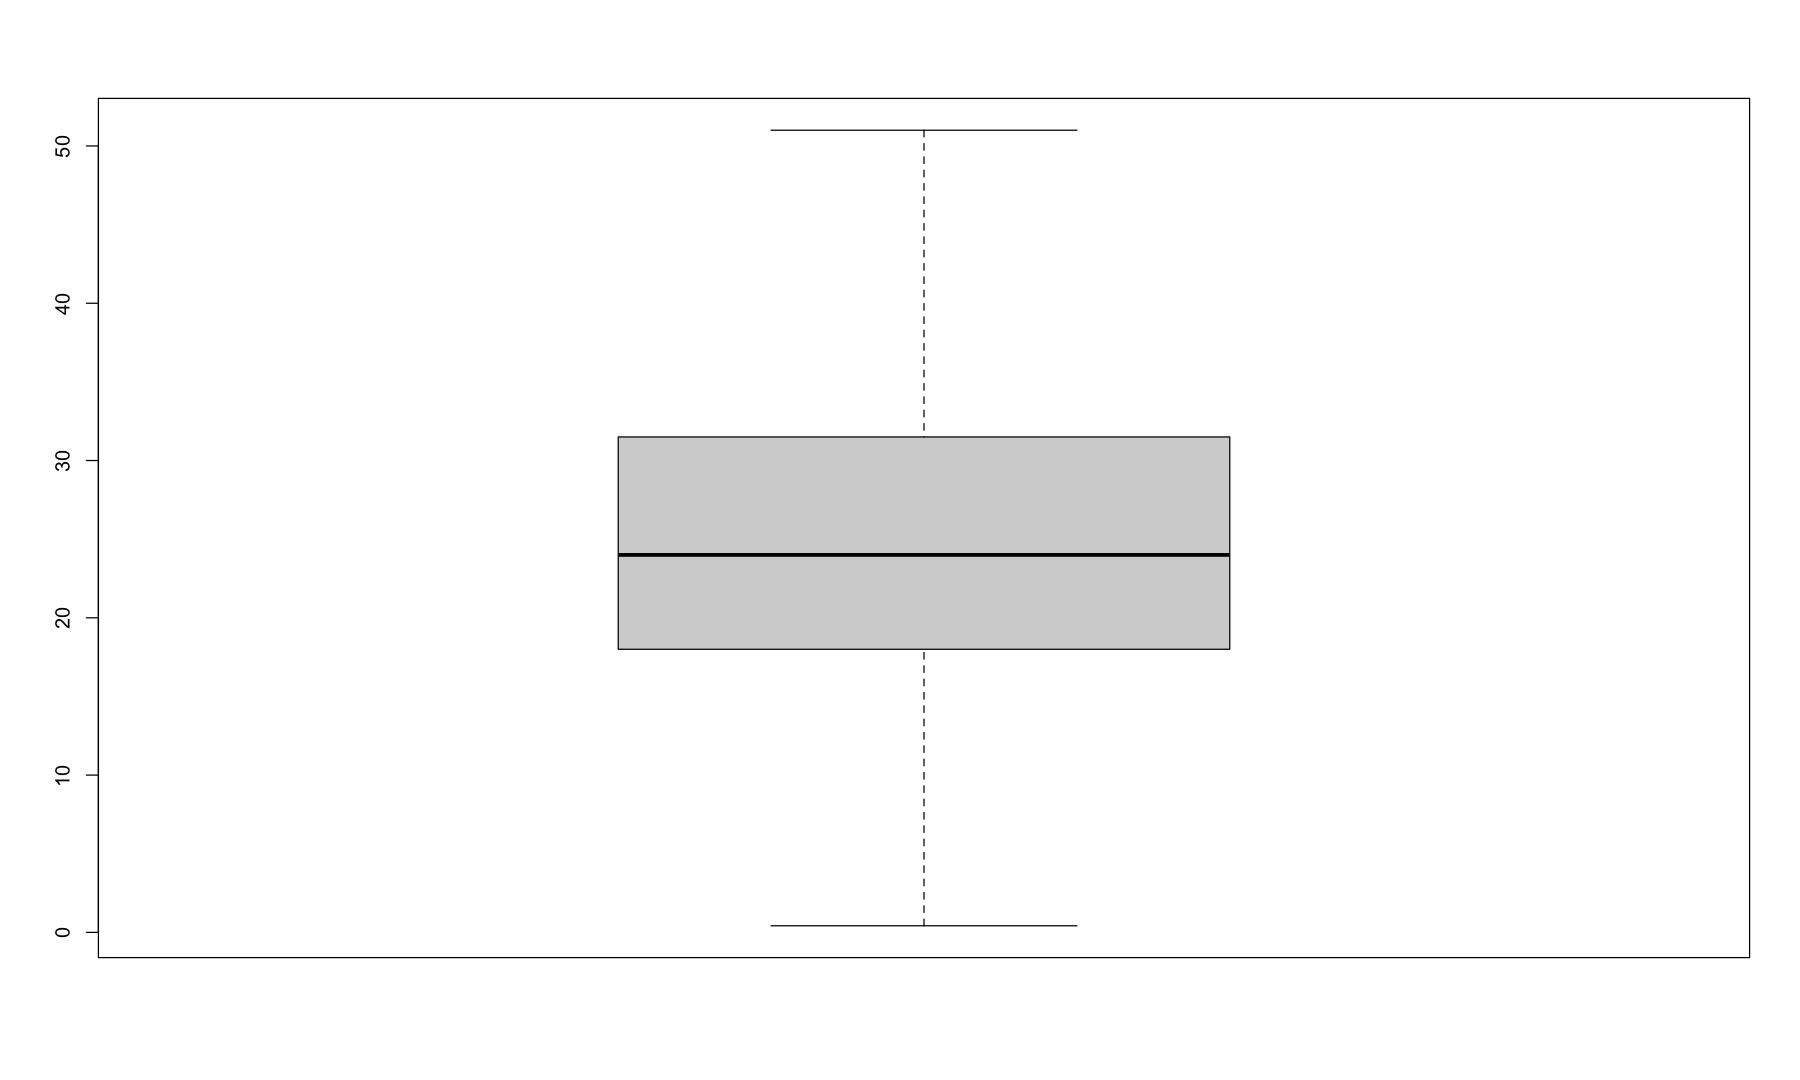

In [17]:
par(bg = 'white')
boxplot(sortedData)
# 이거 NA 값 뺀 나이임

In [18]:
# NA 를 적절한 값으로 대채해서 해보자
head(tai)
NAretai <- tai

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


In [19]:
NAretai[is.na(NAretai)] <- 25

In [20]:
head(NAretai)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,,Q,0


In [21]:
table(NAretai$Cabin)


                            A10             A14             A16             A19 
            687               1               1               1               1 
            A20             A23             A24             A26             A31 
              1               1               1               1               1 
            A32             A34             A36              A5              A6 
              1               1               1               1               1 
             A7            B101            B102             B18             B19 
              1               1               1               2               1 
            B20             B22             B28              B3             B30 
              2               2               2               1               1 
            B35             B37             B38             B39              B4 
              2               1               1               1               1 
            B41            

In [22]:
# 티켓 번호 A ~ T 까지 위에서부터 객실이 지정된다
#   AclassData <-  NAretai[grep("A", NAretai$Cabin),]
#AclassData
#  BclassData <-  NAretai[grep("B", NAretai$Cabin),]
#BclassData
#  CclassData <-  NAretai[grep("C", NAretai$Cabin),]
#CclassData
# DclassData <-  NAretai[grep("D", NAretai$Cabin),]
#DclassData
# EclassData <-  NAretai[grep("E", NAretai$Cabin),]
#EclassData
# FclassData <-  NAretai[grep("F", NAretai$Cabin),]
#FclassData
#name[grep('Co', name)]
# 생존률 A ~ D
table(AclassData$Survived)
table(BclassData$Survived)
table(CclassData$Survived)
table(DclassData$Survived)
table(EclassData$Survived)
table(FclassData$Survived)

ERROR: Error in eval(expr, envir, enclos): 객체 'AclassData'를 찾을 수 없습니다


In [24]:
# 티켓 등급  데이터가 너무 적어서 보류
FareData <- NAretai

AclassData = 전체 데이터에서 A 방번호만 모은거

In [25]:
table(NAretai$Fare)


       0   4.0125        5   6.2375   6.4375     6.45   6.4958     6.75 
      15        1        1        1        1        1        2        2 
  6.8583     6.95    6.975   7.0458     7.05   7.0542    7.125   7.1417 
       1        1        2        1        7        2        4        1 
   7.225   7.2292     7.25   7.3125   7.4958   7.5208     7.55   7.6292 
      12       15       13        1        3        1        4        1 
    7.65    7.725   7.7292   7.7333   7.7375   7.7417     7.75    7.775 
       4        1        1        4        2        1       34       16 
  7.7875   7.7958      7.8   7.8292   7.8542    7.875   7.8792   7.8875 
       1        6        1        2       13        1        4        1 
  7.8958    7.925   8.0292     8.05   8.1125   8.1375   8.1583      8.3 
      38       18        1       43        1        1        1        1 
  8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833 
       1        1        1        1        1      

In [26]:
#breaks <- c(0,10,20,30,40,50,60,)
breaks <- c(0,10,100,200,300)

 FareData$Fare <- cut(NAretai$Fare , breaks)
 table(FareData$Fare)


 Fdata <- subset(FareData, Fare == '(0,10]' & Survived == 1 )
 Fdata2 <- subset(FareData, Fare == '(10,100]' & Survived == 1 )
 Fdata3 <- subset(FareData, Fare == '(100,200]' & Survived == 1 )
 Fdata4 <- subset(FareData, Fare == '(200,300]' & Survived == 1 )
 Fdat <- subset(FareData, Fare == '(0,10]' & Survived == 0 )
 Fdat2 <- subset(FareData, Fare == '(10,100]' & Survived == 0 )
 Fdat3 <- subset(FareData, Fare == '(100,200]' & Survived == 0 )
 Fdat4 <- subset(FareData, Fare == '(200,600]' & Survived == 0 )
 cat('생존자')
 nrow(Fdata)
 nrow(Fdata2)
 nrow(Fdata3)
 nrow(Fdata4)
 cat(' 사망자')
 nrow(Fdat)
 nrow(Fdat2)
 nrow(Fdat3)
 nrow(Fdat4)
 table(Fdata$Sex)
 table(Fdata2$Sex)
 table(Fdata3$Sex)
 table(Fdata4$Sex)
 #Fdata4$Sex
 cat(' 최저돈 생존률')
66 / 255 * 100
cat( '남자 대비 여자 생존률')
28 / 38 * 100
 cat(' 저돈 생존률')
236 / 266 * 100 
cat( '남자 대비 여자 생존률')
73 / 163 * 100
 cat(' 중상돈 생존률')
8 / 25 * 100
cat( '남자 대비 여자 생존률')
5 / 20 * 100
 cat(' 최상돈 생존률')
6 / 11 * 100
cat( '남자 대비 여자 생존률')
100



   (0,10]  (10,100] (100,200] (200,300] 
      321       502        33        17 

생존자

[1] 66

[1] 236

[1] 25

[1] 11

 사망자

[1] 255

[1] 266

[1] 8

[1] 0


female   male 
    38     28 


female   male 
   163     73 


female   male 
    20      5 


female 
    11 

 최저돈 생존률

[1] 25.88235

남자 대비 여자 생존률

[1] 73.68421

 저돈 생존률

[1] 88.7218

남자 대비 여자 생존률

[1] 44.78528

 중상돈 생존률

[1] 32

남자 대비 여자 생존률

[1] 25

 최상돈 생존률

[1] 54.54545

남자 대비 여자 생존률

[1] 100

In [30]:


#FareData <- FareData[-1]

head(FareData)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyWhith
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<fct>,<chr>,<chr>,<int>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"(0,10]",,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,"(10,100]",C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"(0,10]",,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"(10,100]",C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"(0,10]",,S,0
6,0,3,"Moran, Mr. James",male,25,0,0,330877,"(0,10]",,Q,0


In [35]:
FareDataS <- subset(FareData, FareData$Embarked == 'S')
FareDataC <- subset(FareData, FareData$Embarked == 'C')
FareDataQ <- subset(FareData, FareData$Embarked == 'Q')

nrow(FareDataS)
nrow(FareDataC)
nrow(FareDataQ)



[1] 644

[1] 168

[1] 77